In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_price_size_year.csv')
df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [3]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


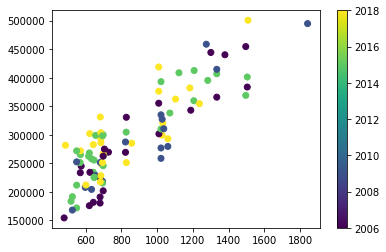

In [4]:
plt.scatter(df['size'], df['price'], c=df['year'])
plt.colorbar()

In [5]:
X = df[['size', 'year']]
Y = df['price'].to_numpy()

minX = np.min(X, axis=0)
maxX = np.max(X, axis=0)

# headers = X.columns
difference = [maxX[i] - minX[i] for i in range(len(X.columns))]

X = np.c_[np.ones(df.shape[0]), (X - minX) / difference]

In [6]:
X.shape

(100, 3)

In [7]:
iterations = 1500
alpha = 0.01

In [8]:
def compute_cost(X, Y, theta):
    m = len(Y)
    J = (1/(2*m)) * sum((np.matmul(X, theta) - Y)**2)
    return J

In [9]:
def gradient_descent(X, Y, theta, alpha, n_iterations):
    m = len(Y)
    J_history = []
    tmp = []
    
    for _ in range(n_iterations):
        for i in range(X.shape[1]):
            tmp.append(theta[i] - alpha * (1/m) * sum(np.multiply(np.matmul(X, theta) - Y, X[:, i])))
        theta = tmp
        tmp = []
        J_history.append(compute_cost(X, Y, theta))
        
    return J_history, theta

In [10]:
J_history, theta = gradient_descent(X, Y, [0, 0, 0], alpha, iterations)

In [11]:
theta

[219927.91670119425, 190641.36845108573, 37565.99915800538]

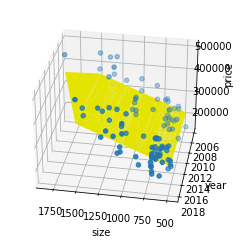

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = X[:, 1] * difference[0] + minX[0]
ys = X[:, 2] * difference[1] + minX[1]
zs = Y

ax.scatter(xs, ys, zs, marker='o')
ax.plot_trisurf(xs, ys, np.matmul(X, theta), color='yellow')

ax.set_xlabel('size')
ax.set_ylabel('year')
ax.set_zlabel('price')

ax.view_init(30, 100)
    
plt.show()